## Boston Dataset

### Importing Required Libraries 

In [143]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [144]:
# we will load the housing data from the scikit-learn library and understand it.

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [145]:
# We print the value of the boston_dataset to understand what it contains. 
print(boston_dataset.keys()) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [146]:
#boston_dataset.DESCR # Gives the description of the data


#CRIM: Per capita crime rate by town
#ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#INDUS: Proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: Nitric oxide concentration (parts per 10 million)
#RM: Average number of rooms per dwelling
#AGE: Proportion of owner-occupied units built prior to 1940
#DIS: Weighted distances to five Boston employment centers
#RAD: Index of accessibility to radial highways
#TAX: Full-value property tax rate per $10,000
#PTRATIO: Pupil-teacher ratio by town
#B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
#LSTAT: Percentage of lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

In [147]:
#The prices of the house indicated by the variable MEDV is our target variable and the remaining are 
#the feature variables based on which we will predict the value of a house.



In [148]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [149]:
# We can see that the target value MEDV is missing from the data. 
# We create a new column of target values and add it to the dataframe.

boston['MEDV'] = boston_dataset.target


In [150]:
# Checking the number of rows and columns
boston.shape

(506, 14)

In [151]:
# check the basic information about the dataset
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [152]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [153]:
# Basic statistics
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Pre processing steps

In [154]:
# Missing Values
boston.isnull().sum()

# Conculsion: No missing data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:ylabel='CRIM'>

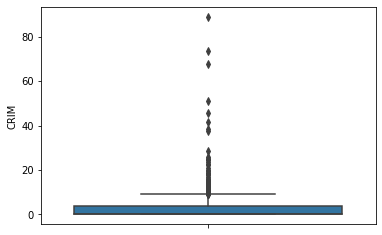

In [155]:
# Check for Outliers
sns.boxplot(y = 'CRIM', data = boston)

<AxesSubplot:ylabel='ZN'>

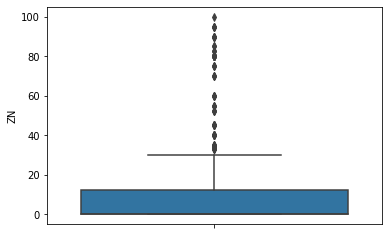

In [156]:
sns.boxplot(y = 'ZN', data = boston)

<AxesSubplot:ylabel='INDUS'>

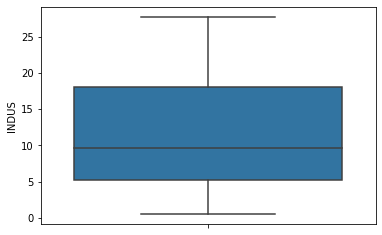

In [157]:
sns.boxplot(y = 'INDUS', data = boston)

<AxesSubplot:ylabel='CHAS'>

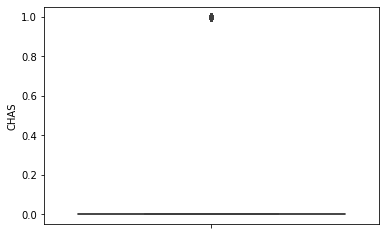

In [158]:
sns.boxplot(y = 'CHAS', data = boston)

<AxesSubplot:ylabel='NOX'>

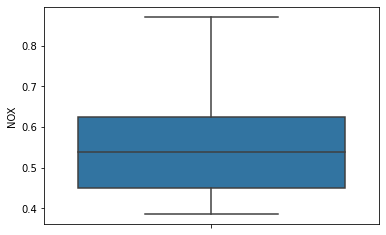

In [159]:
sns.boxplot(y = 'NOX', data = boston)

<AxesSubplot:ylabel='RM'>

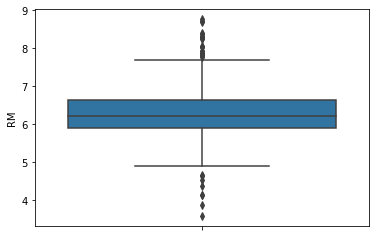

In [160]:
sns.boxplot(y = 'RM', data = boston)

<AxesSubplot:ylabel='AGE'>

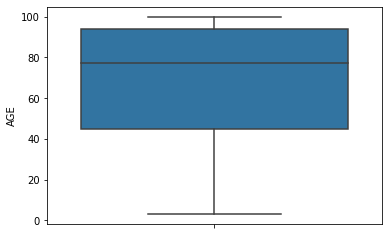

In [161]:
sns.boxplot(y = 'AGE', data = boston)

<AxesSubplot:ylabel='DIS'>

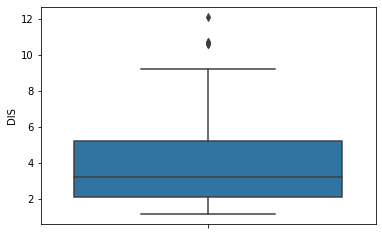

In [162]:
sns.boxplot(y = 'DIS', data = boston)

<AxesSubplot:ylabel='RAD'>

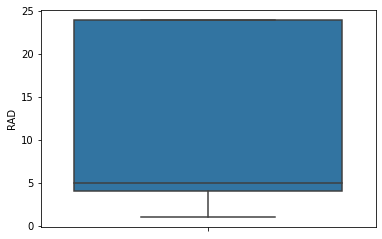

In [163]:
sns.boxplot(y = 'RAD', data = boston)

<AxesSubplot:ylabel='TAX'>

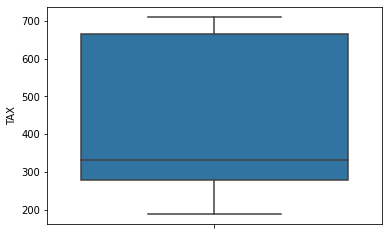

In [164]:
sns.boxplot(y = 'TAX', data = boston)

<AxesSubplot:ylabel='PTRATIO'>

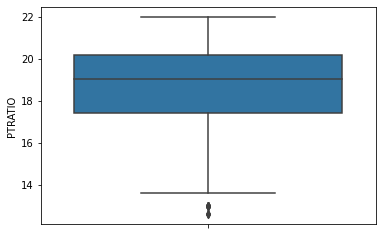

In [165]:
sns.boxplot(y = 'PTRATIO', data = boston)

<AxesSubplot:ylabel='B'>

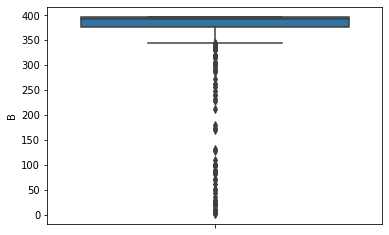

In [166]:
sns.boxplot(y = 'B', data = boston)

<AxesSubplot:ylabel='LSTAT'>

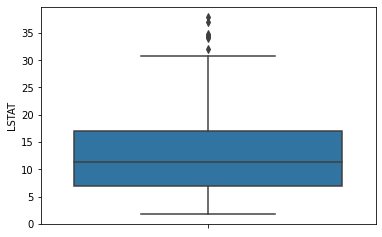

In [167]:
sns.boxplot(y = 'LSTAT', data = boston)

In [168]:
# Conclusion: Features CRIM,ZN,CHAS,RM,DIS,PTRATIO,LSTAT,B have outliers which will need to be treated

In [169]:
# using the cuberoot tranformation to treat outliers
boston.iloc[:,:-1] = np.cbrt(boston.iloc[:,:-1])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.184887,2.620741,1.321916,0.0,0.813319,1.873406,4.024845,1.599218,1.000000,6.664444,2.482545,7.348979,1.707693,24.0
1,0.301144,0.000000,1.919286,0.0,0.776946,1.858664,4.289029,1.706217,1.259921,6.231680,2.610999,7.348979,2.090814,21.6
2,0.301070,0.000000,1.919286,0.0,0.776946,1.929637,3.938647,1.706217,1.259921,6.231680,2.610999,7.323773,1.591360,34.7
3,0.318699,0.000000,1.296638,0.0,0.770824,1.912749,3.577848,1.823378,1.442250,6.055049,2.654283,7.334942,1.432570,33.4
4,0.410256,0.000000,1.296638,0.0,0.770824,1.926229,3.784424,1.823378,1.442250,6.055049,2.654283,7.348979,1.746797,36.2


<AxesSubplot:ylabel='CRIM'>

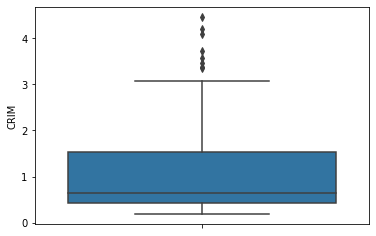

In [170]:
sns.boxplot(y = 'CRIM', data = boston)

<AxesSubplot:ylabel='LSTAT'>

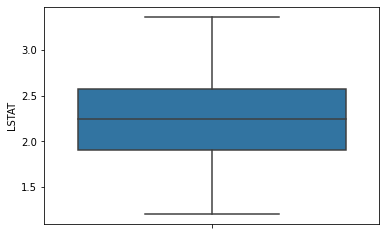

In [171]:
sns.boxplot(y = 'LSTAT', data = boston)

In [172]:
# Observations: Outliers don't seem to be totally removed.There are some still present

### Exploratory Data Analysis(EDA)

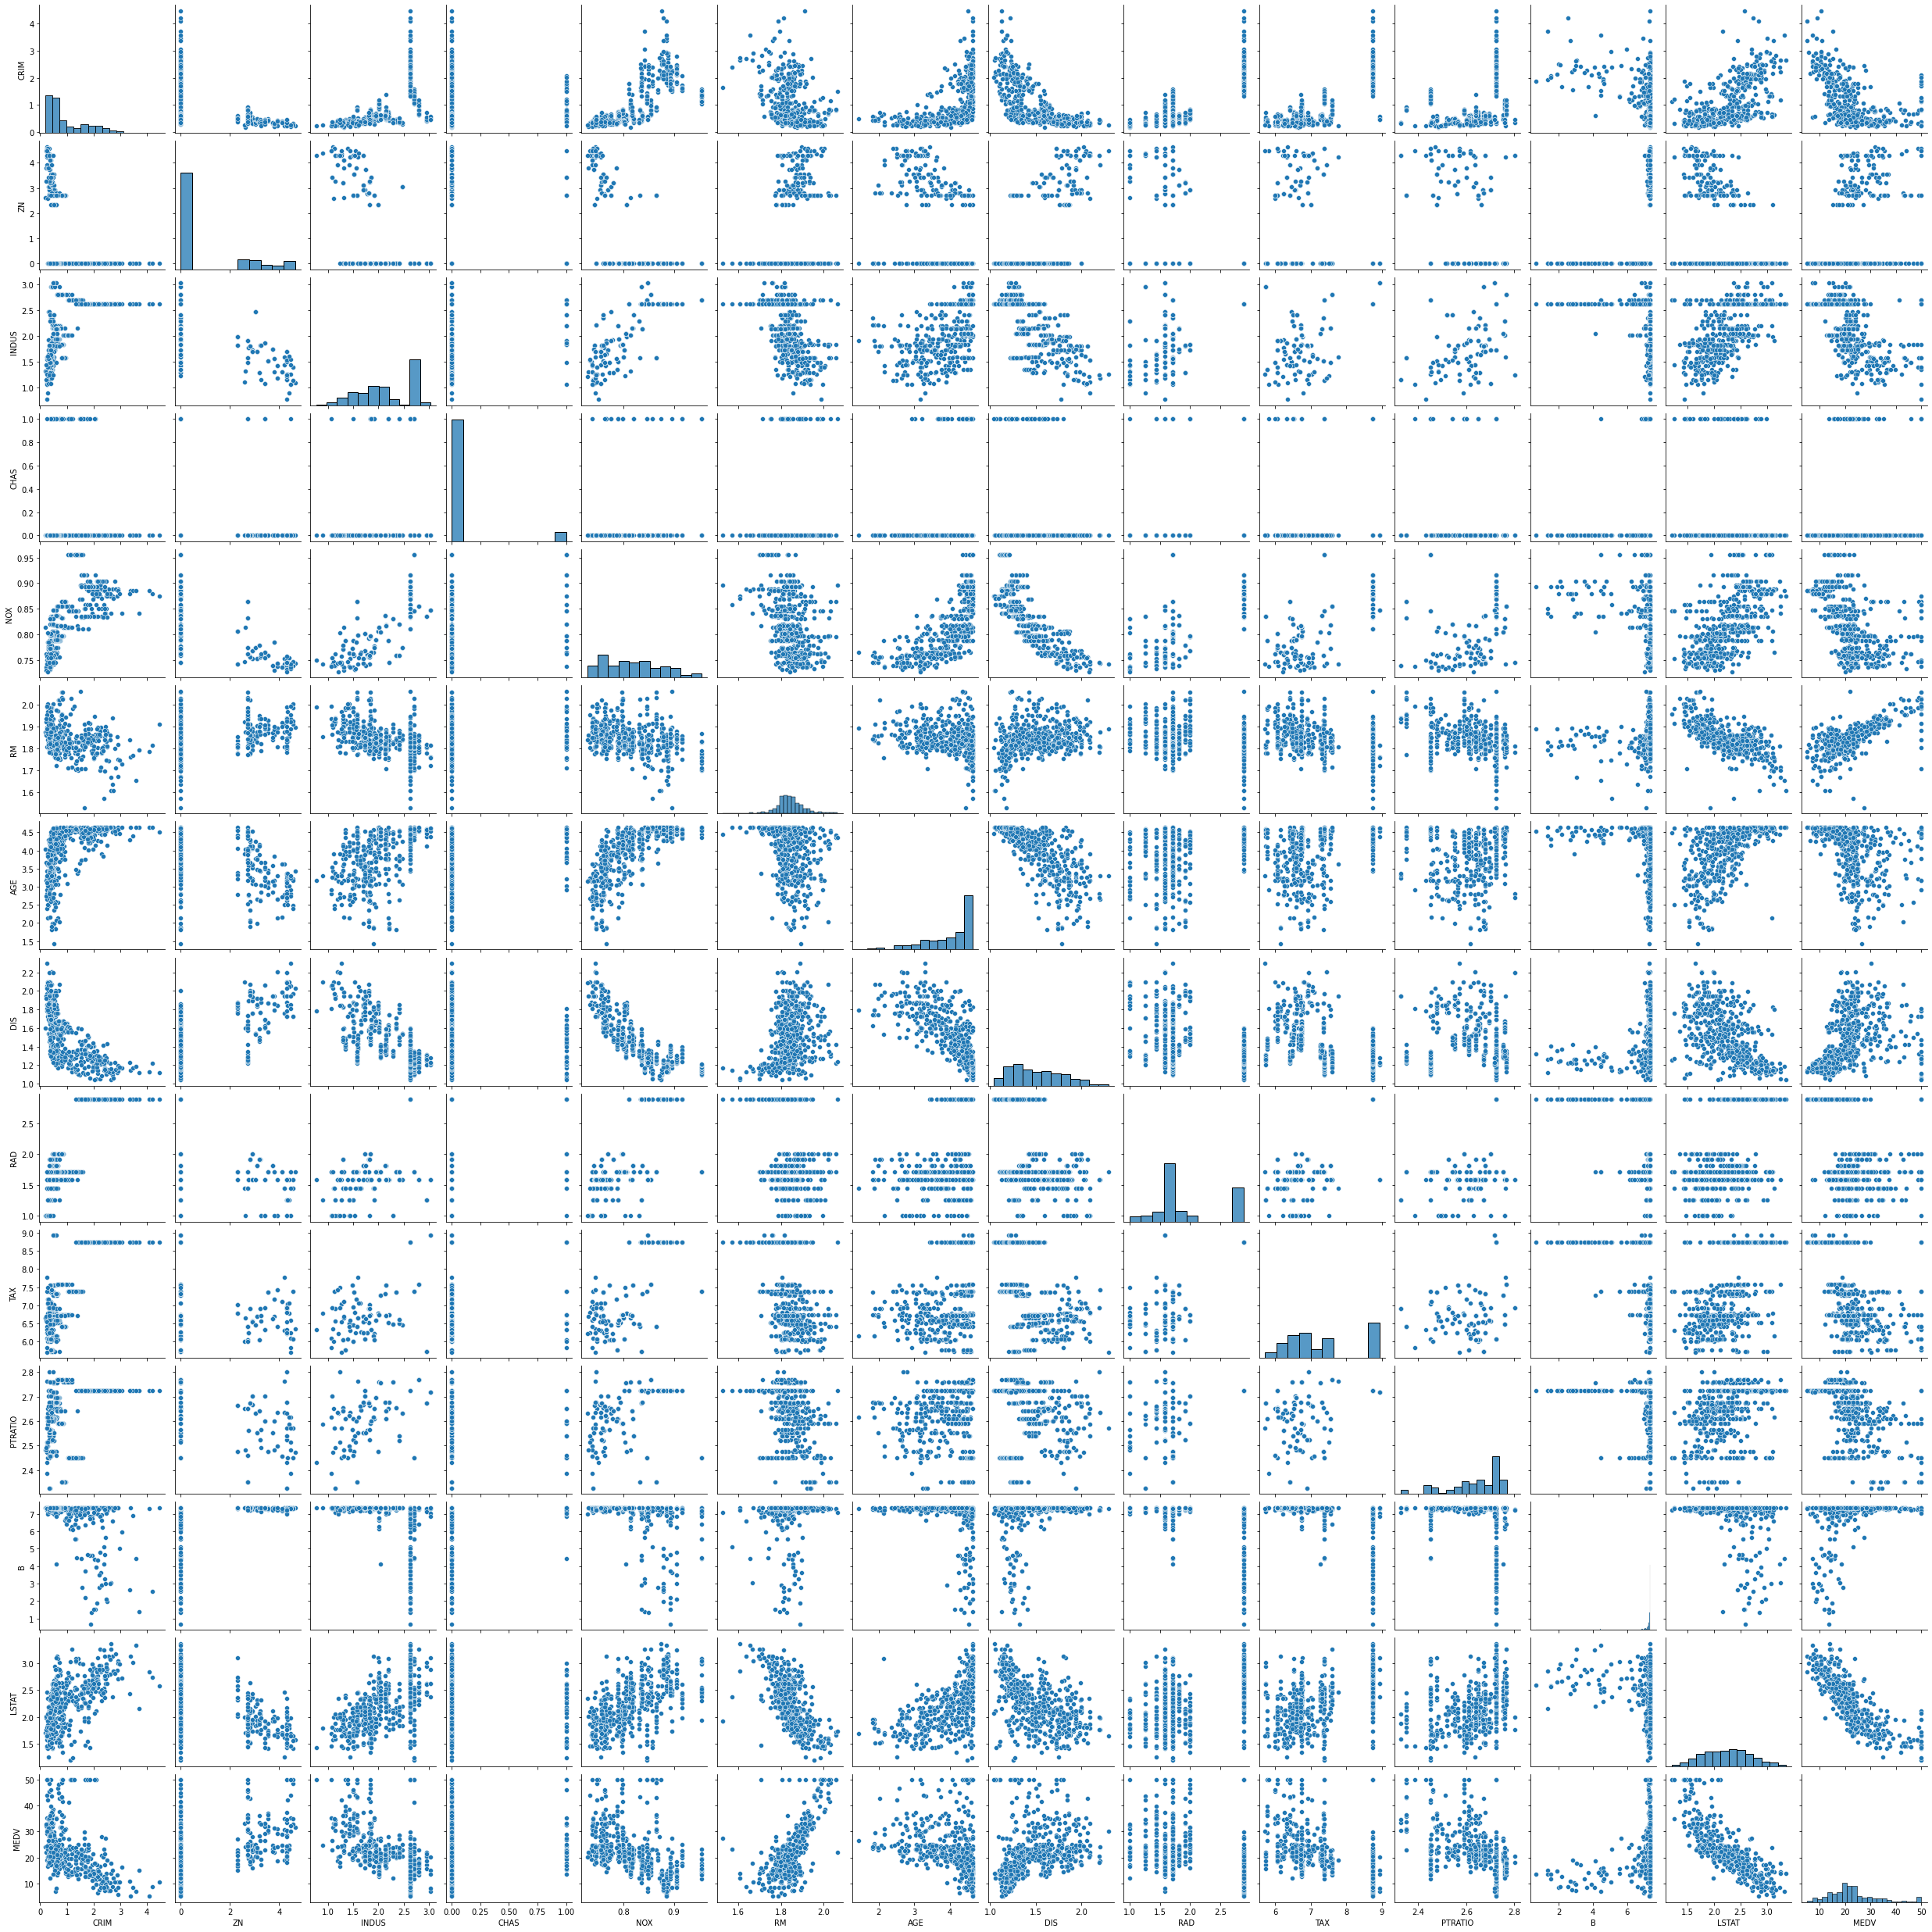

In [173]:
# Multivariate Analysis
sns.pairplot(boston)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

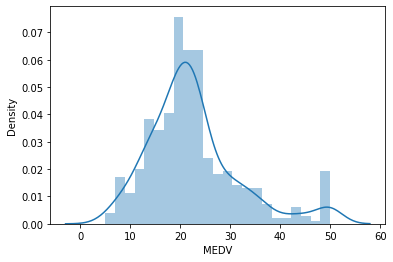

In [174]:
# Univariate analysis
sns.distplot(boston['MEDV'])

# Conclusion: Data is more or less normally distributed

In [175]:
# Correlation
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.434210,0.664848,-0.012219,0.721127,-0.308347,0.525571,-0.665025,0.861654,0.822181,0.377653,-0.472045,0.590550,-0.469600
ZN,-0.434210,1.000000,-0.651321,-0.042059,-0.581888,0.334856,-0.557930,0.660412,-0.357072,-0.382711,-0.452500,0.186475,-0.479509,0.384807
INDUS,0.664848,-0.651321,1.000000,0.076609,0.767973,-0.423346,0.583704,-0.748394,0.595979,0.696134,0.410599,-0.309453,0.628993,-0.513706
CHAS,-0.012219,-0.042059,0.076609,1.000000,0.085512,0.086399,0.090932,-0.091258,0.004609,-0.036780,-0.118277,0.053386,-0.065524,0.175260
NOX,0.721127,-0.581888,0.767973,0.085512,1.000000,-0.313901,0.709396,-0.840834,0.622060,0.672993,0.199180,-0.334783,0.603153,-0.430386
RM,-0.308347,0.334856,-0.423346,0.086399,-0.313901,1.000000,-0.230712,0.255000,-0.213806,-0.303156,-0.345874,0.099331,-0.648979,0.673375
AGE,0.525571,-0.557930,0.583704,0.090932,0.709396,-0.230712,1.000000,-0.733768,0.422627,0.453301,0.230107,-0.221588,0.584735,-0.350395
DIS,-0.665025,0.660412,-0.748394,-0.091258,-0.840834,0.255000,-0.733768,1.000000,-0.540253,-0.585292,-0.224809,0.281376,-0.534476,0.280830
RAD,0.861654,-0.357072,0.595979,0.004609,0.622060,-0.213806,0.422627,-0.540253,1.000000,0.866004,0.432692,-0.413034,0.470405,-0.363156
TAX,0.822181,-0.382711,0.696134,-0.036780,0.672993,-0.303156,0.453301,-0.585292,0.866004,1.000000,0.430716,-0.405309,0.535155,-0.473698


In [176]:
#To fit a linear regression model, we select those features which have a high correlation with our 
#target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive
#correlation with MEDV (0.67) where as LSTAT has a high negative correlation with MEDV(-0.79).


<AxesSubplot:>

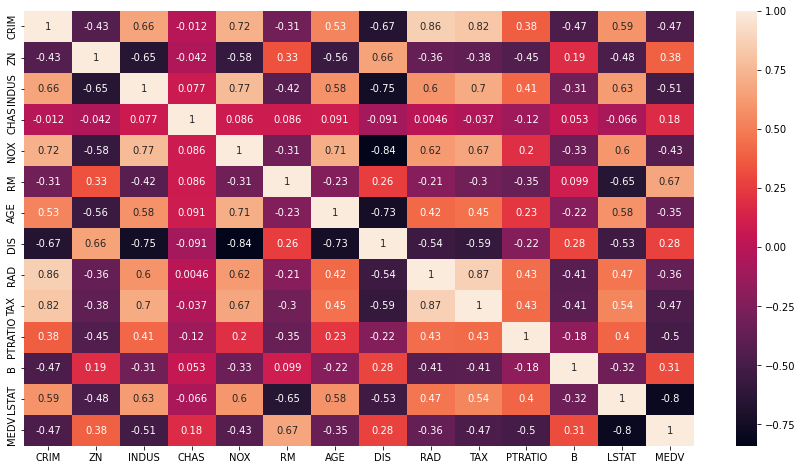

In [177]:
# Bivariate analysis
plt.figure(figsize = (15,8))
sns.heatmap(boston.corr(), annot = True)

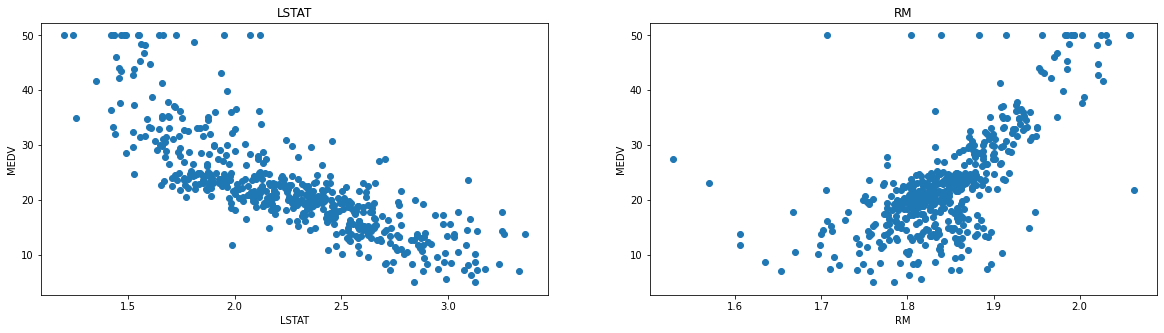

In [178]:
# Bivariate analysis

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [179]:
# Observation: 
# The prices increase as the value of RM increases linearly. There are few outliers and the data seems 
# to be capped at 50.

# The prices tend to decrease with an increase in LSTAT. 

In [180]:
# Split the data into independent and dependent variables
x = boston.iloc[:, :-1]
y = boston.iloc[:, -1]

In [181]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.184887,2.620741,1.321916,0.0,0.813319,1.873406,4.024845,1.599218,1.000000,6.664444,2.482545,7.348979,1.707693
1,0.301144,0.000000,1.919286,0.0,0.776946,1.858664,4.289029,1.706217,1.259921,6.231680,2.610999,7.348979,2.090814
2,0.301070,0.000000,1.919286,0.0,0.776946,1.929637,3.938647,1.706217,1.259921,6.231680,2.610999,7.323773,1.591360
3,0.318699,0.000000,1.296638,0.0,0.770824,1.912749,3.577848,1.823378,1.442250,6.055049,2.654283,7.334942,1.432570
4,0.410256,0.000000,1.296638,0.0,0.770824,1.926229,3.784424,1.823378,1.442250,6.055049,2.654283,7.348979,1.746797


In [182]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Feature Scaling

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [184]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.041090,1.135810,-1.576685,-0.272599,-0.081631,0.444966,0.059716,0.324014,-1.603727,-0.633889,-1.450849,0.361283,-1.234824
1,-0.894456,-0.583147,-0.397244,-0.272599,-0.736574,0.230220,0.440416,0.713560,-1.163226,-1.075230,-0.254746,0.361283,-0.358679
2,-0.894549,-0.583147,-0.397244,-0.272599,-0.736574,1.264077,-0.064500,0.713560,-1.163226,-1.075230,-0.254746,0.338036,-1.500862
3,-0.872314,-0.583147,-1.626594,-0.272599,-0.846816,1.018072,-0.584428,1.140103,-0.854225,-1.255362,0.148296,0.348337,-1.863993
4,-0.756836,-0.583147,-1.626594,-0.272599,-0.846816,1.214435,-0.286742,1.140103,-0.854225,-1.255362,0.148296,0.361283,-1.145399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.773397,-0.583147,0.324754,-0.272599,0.229302,0.469847,0.173127,-0.571198,-1.603727,-0.814692,1.122668,0.333218,-0.267991
502,-0.824764,-0.583147,0.324754,-0.272599,0.229302,-0.199638,0.382428,-0.701223,-1.603727,-0.814692,1.122668,0.361283,-0.369165
503,-0.778432,-0.583147,0.324754,-0.272599,0.229302,0.988843,0.741468,-0.786616,-1.603727,-0.814692,1.122668,0.361283,-1.069408
504,-0.670702,-0.583147,0.324754,-0.272599,0.229302,0.744652,0.700852,-0.631366,-1.603727,-0.814692,1.122668,0.341587,-0.876595


### Variance Inflation Factor(VIF)

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x_scaled
vif = pd.DataFrame()

vif['Features'] = x.columns
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

In [186]:
vif

,Features,Variance Inflation Factor
0,CRIM,5.919554
1,ZN,2.498539
2,INDUS,4.013478
3,CHAS,1.081724
4,NOX,5.286585
5,RM,1.994892
6,AGE,2.740182
7,DIS,4.971549
8,RAD,6.193929
9,TAX,5.496597


In [ ]:
# Observation: An important point in selecting features for a linear regression model is to check for
# multi-co-linearity.The features CRIM, NOX, RAD and TAX have VIF values more than 5 which means that they show
# multicollinearity and hence will need to be dropped.

In [ ]:
# Observation: From the OLS methdo we found that AGE and ZN featuresa re no significant and need to dropped .
# Remake the model after dropping those two variables

In [187]:
x = x.drop(['CRIM', 'NOX', 'RAD', 'TAX', 'AGE', 'ZN'], axis = 1)

In [188]:
x.head()

,INDUS,CHAS,RM,DIS,PTRATIO,B,LSTAT
0,1.321916,0.0,1.873406,1.599218,2.482545,7.348979,1.707693
1,1.919286,0.0,1.858664,1.706217,2.610999,7.348979,2.090814
2,1.919286,0.0,1.929637,1.706217,2.610999,7.323773,1.591360
3,1.296638,0.0,1.912749,1.823378,2.654283,7.334942,1.432570
4,1.296638,0.0,1.926229,1.823378,2.654283,7.348979,1.746797


### Train Test Split

In [189]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

print('x train : ', x_train.shape)
print('x test : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x train :  (404, 7)
x test :  (102, 7)
y_train :  (404,)
y_test :  (102,)


In [ ]:
x_train.head()

In [ ]:
x_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

### Creating Linear regression Model with the training dataset

In [190]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

In [ ]:
print(lm.coef_)

In [ ]:
coef_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
coef_df

### Predicting the Model with test data

In [191]:
y_pred = lm.predict(x_test)
y_pred

array([40.52716272, 30.34327485, 17.1061808 , 17.15973664, 30.78272039,
       30.69797402, 38.4996067 ,  8.84422937, 35.41957932, 10.87346093,
       29.58143833, 14.25611306, 17.37845254, 20.80102135, 25.20961551,
       20.93698435,  8.99926145, 32.4473493 , 29.70227776, 25.66880669,
       13.32511446, 18.32854964, 24.47418795, 29.21760156, 32.84030699,
       19.56583054, 31.06712217, 19.40858415, 28.42811616, 32.55176808,
       20.04394806, 19.13040512, 35.83633161, 43.34144139, 28.76052076,
       20.8995629 , 15.11659202, 18.33814632,  6.85258825, 32.04327297,
       22.24673002, 21.37167416, 37.68175487, 13.79968286, 16.8463483 ,
       25.04480026, 32.44936909, 16.85680816, 26.03705492, 25.07411921,
       33.29311684, 39.0651421 , 21.08884122, 18.79085407, 32.67102035,
        2.75801299, 19.61402854, 16.46113205, 20.33464223, 21.79097955,
       31.70282223,  5.83844738, 17.24602721, 18.03793938,  9.32239615,
       25.18257934, 23.06419107, 18.32096846, 17.77153354, 18.63

In [192]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7262943852542254

### Regression Model Evaluation By OLS method

In [193]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [194]:
reg_model = smf.OLS(endog = y_train,exog = x_train).fit()

In [195]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1681.
Date:                Tue, 24 May 2022   Prob (F-statistic):                   1.42e-290
Time:                        16:57:32   Log-Likelihood:                         -1165.9
No. Observations:                 404   AIC:                                      2346.
Df Residuals:                     397   BIC:                                      2374.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INDUS         -1.7053      0.740     -2.305      0.022      -3.160      -0.251
CHAS           3.3535      0.894      3.751      0.000       1.596       5.111
RM            43.5484      2.298     18.951      0.000      39.031      48.066
DIS           -7.1873      1.183     -6.076      0.000      -9.513      -4.862
PTRATIO       -9.2954      2.083     -4.463      0.000     -13.390      -5.201
B              0.9336      0.207      4.505      0.000       0.526       1.341
LSTAT        -11.3584      0.745    -15.237      0.000     -12.824      -9.893
==============================================================================
Omnibus:                      134.949   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.460
Skew:                           1.391   Prob(JB):                    9.13e-132
Kurtosis:                       8.302   Cond. No.                         114.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
# Observation: Adjusted R square value is 0.967 whic means model is good model

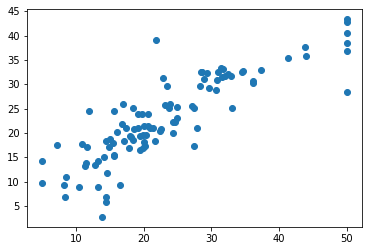

In [197]:
# Check if the data is linear
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

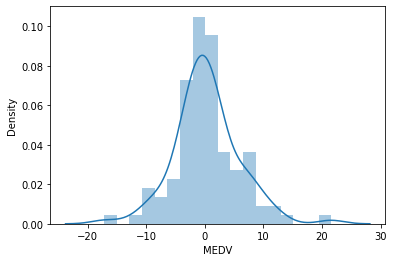

In [198]:
# Check the data for normal distribution
sns.distplot(y_test - y_pred)

In [ ]:
# Data shows normal distribution

### Checking for Overfit or Underfit model

In [199]:
# Import basic libraraies for regularization
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, LassoCV

In [200]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma

In [201]:
# Lasso Regularization-will return best lambda and coefficient value/weight after performing cross validation

lasso_model = LassoCV(cv=10, max_iter=10000, normalize=True)
lasso_model.fit(x_train, y_train)


LassoCV(cv=10, max_iter=10000, normalize=True)

In [202]:
lasso_model.score(x_test, y_test)

0.7260504165713152

In [203]:
# Ridge Regularization
ridgecv = RidgeCV(cv = 10, normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, normalize=True)

In [204]:
ridgecv.score(x_test, y_test)

0.7173551116347561

In [ ]:
# r2_score = 72.6%
# OLS method(training accuracy Adjusted R square) = 96.7%
# Lasso method = 72.6%
# ridge method = 71.7%

In [ ]:
# Conclusion: There is a difference in the traininga and testing accuarcy which shows overfitting problem.
# Linear Regression model is not a good fit for this dataset and we need to try Random Forest model